In [22]:
# import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [23]:
# Read the dataset
df = pd.read_csv('mouse_viral_study.csv')

In [24]:
df

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1
...,...,...,...
395,2.884122,3.271748,1
396,7.290855,9.488672,0
397,7.895325,8.272529,0
398,2.690592,2.674979,1


In [25]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


In [26]:
# Hyperplane 2D
x = np.linspace(0,10,100)
m = -1
b = 11

y = m*x + b

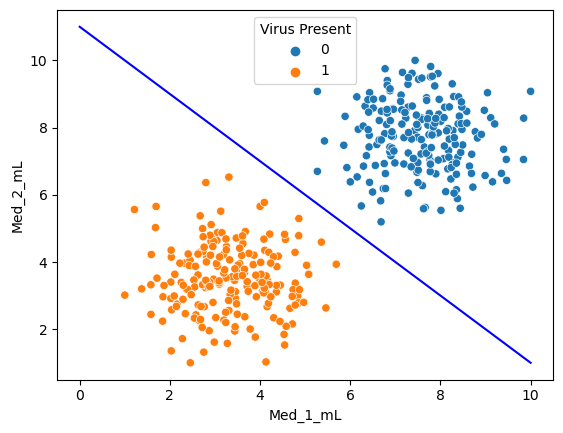

In [27]:
#Exploratory analysis
sns.scatterplot(data=df, x='Med_1_mL', y='Med_2_mL', hue='Virus Present')
plt.plot(x,y, color='blue')

In [28]:
# Explore the SVM
from sklearn.svm import SVC

In [29]:
# Perform train test split
X = df.drop('Virus Present', axis=1)
y = df['Virus Present']

In [30]:
X

,Med_1_mL,Med_2_mL
0,6.508231,8.582531
1,4.126116,3.073459
2,6.427870,6.369758
3,3.672953,4.905215
4,1.580321,2.440562
...,...,...
395,2.884122,3.271748
396,7.290855,9.488672
397,7.895325,8.272529
398,2.690592,2.674979


In [31]:
y

0      0
1      1
2      0
3      1
4      1
      ..
395    1
396    0
397    0
398    1
399    0
Name: Virus Present, Length: 400, dtype: int64

In [32]:
# create an instance of the SVM MODEL
SVM_model = SVC(kernel='linear', C=1000)

In [33]:
# fit the model to the feature and label
SVM_model.fit(X,y)

SVC(C=1000, kernel='linear')

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


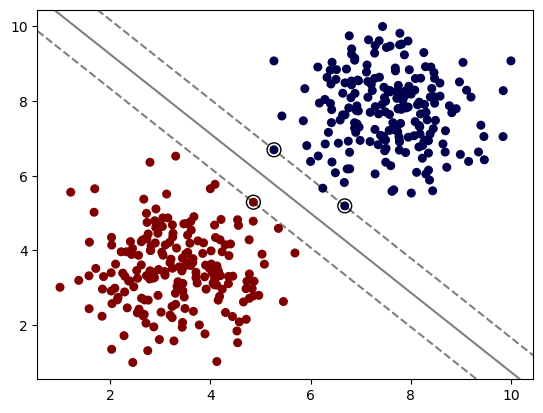

In [34]:
# visualize the model
from svm_margin_plot import plot_svm_boundary
plot_svm_boundary(SVM_model,X,y)

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


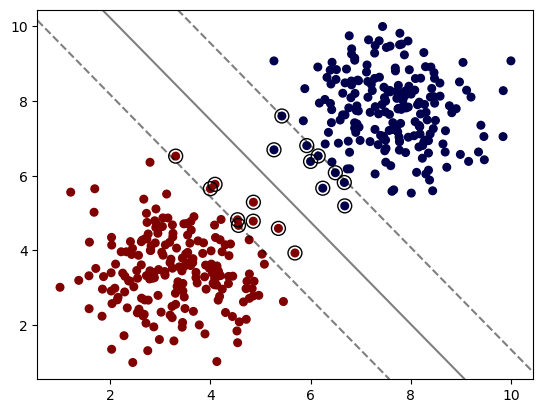

In [36]:
SVM_model1 = SVC(kernel='linear', C=0.05)
SVM_model1.fit(X,y)
plot_svm_boundary(SVM_model1,X,y)

# note that as C get smaller, more points are allowed to go within the mergin
# C in scikit learn is inverse of the theoretical soft margin

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


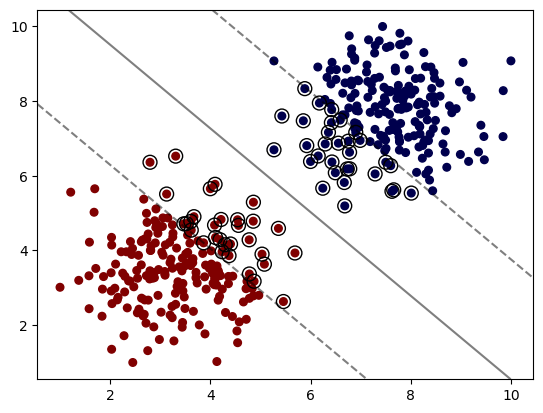

In [37]:
SVM_model1 = SVC(kernel='linear', C=0.005)
SVM_model1.fit(X,y)
plot_svm_boundary(SVM_model1,X,y)

RADIAL BASIS FUNCTION KERNEL

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


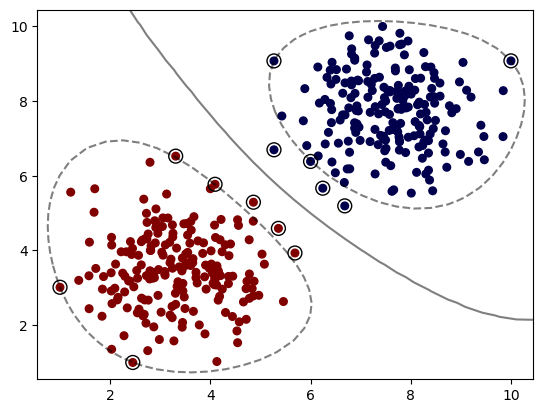

In [42]:
SVM_RBF_model = SVC(kernel='rbf', C=1, gamma='scale')
SVM_RBF_model.fit(X,y)
plot_svm_boundary(SVM_RBF_model,X,y)

SIGMOID KERNEL

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


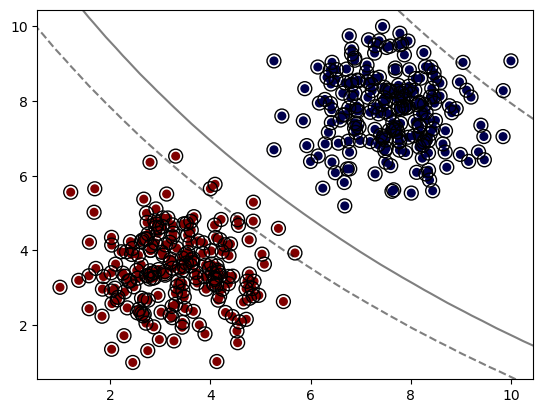

In [43]:
SVM_SGMD_model = SVC(kernel='sigmoid')
SVM_SGMD_model.fit(X,y)
plot_svm_boundary(SVM_SGMD_model,X,y)

POLYNOMIAL KERNEL

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


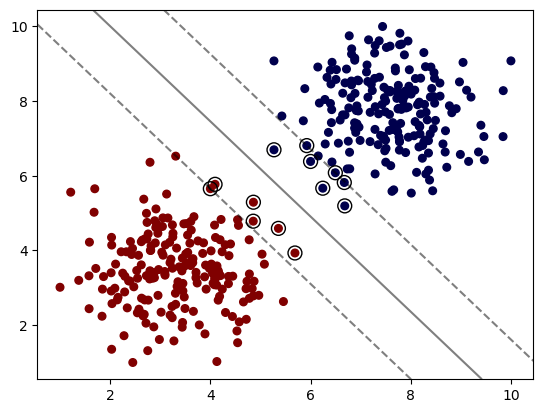

In [46]:
SVM_PLYN_model = SVC(kernel='poly', C=1, degree=1)
SVM_PLYN_model.fit(X,y)
plot_svm_boundary(SVM_PLYN_model,X,y)

UTILIZING GRID SEARCH CROSS VALIDATION TO OBTAIN BEST PARAMETERS

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
# Create the base SVM model
SVM_BASE_MODEL = SVC()
# Create the parameter grid
param_grid = {'C':[0.01, 0.1, 1], 'kernel':['linear','rbf']}

In [49]:
# build the SVM Grid Model
SVM_Grid_Model = GridSearchCV(SVM_BASE_MODEL,param_grid)

In [50]:
SVM_Grid_Model.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [51]:
# select best params
SVM_Grid_Model.best_params_

{'C': 0.01, 'kernel': 'linear'}